## Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Igonoring Warnings

import warnings
warnings.filterwarnings('ignore')

## Inspecting the Dataframe

In [3]:
df = pd.read_csv('Weather.csv')

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary
0,0,0,2015-02-22 00:00:00.000 +0100,rain,3.705556,-0.094444,0.63,16.7118,131.0,9.982,0.0,1009.37,Overcast
1,1,1,2015-02-22 01:00:00.000 +0100,rain,4.138889,0.577778,0.64,15.8102,130.0,9.982,0.0,1009.33,Overcast
2,2,2,2015-02-22 02:00:00.000 +0100,rain,4.261111,0.572222,0.65,16.8889,130.0,9.982,0.0,1008.67,Overcast
3,3,3,2015-02-22 03:00:00.000 +0100,rain,2.755556,-0.805556,0.73,13.8782,130.0,9.982,0.0,1008.25,Mostly Cloudy
4,4,4,2015-02-22 04:00:00.000 +0100,rain,3.372222,-0.722222,0.74,18.1608,129.0,9.982,0.0,1007.68,Mostly Cloudy


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary
14995,14995,14995,2016-09-09 19:00:00.000 +0200,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly Cloudy
14996,14996,14996,2016-09-09 20:00:00.000 +0200,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly Cloudy
14997,14997,14997,2016-09-09 21:00:00.000 +0200,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly Cloudy
14998,14998,14998,2016-09-09 22:00:00.000 +0200,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly Cloudy
14999,14999,14999,2016-09-09 23:00:00.000 +0200,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly Cloudy


In [6]:
df.shape

(15000, 13)

In [7]:
data = df.drop(['Unnamed: 0.1','Unnamed: 0','Formatted Date','Loud Cover'],axis=1)

In [8]:
data.shape

(15000, 9)

In [9]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,12.309906,11.247777,0.751201,10.918754,185.846600,11.184844,1008.171549
std,8.988514,10.156602,0.184384,6.550927,106.304343,4.674446,93.061552
min,-13.066667,-17.222222,0.230000,0.000000,0.000000,0.000000,0.000000
25%,5.072222,2.861111,0.630000,6.246800,121.000000,8.243200,1012.727500
50%,12.027778,12.027778,0.800000,10.336200,177.000000,10.352300,1016.915000
75%,18.822222,18.822222,0.900000,14.087500,289.000000,15.729700,1020.330000
max,37.194444,37.783333,1.000000,46.609500,359.000000,16.100000,1042.380000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Precip Type               14626 non-null  object 
 1   Temperature (C)           15000 non-null  float64
 2   Apparent Temperature (C)  15000 non-null  float64
 3   Humidity                  15000 non-null  float64
 4   Wind Speed (km/h)         15000 non-null  float64
 5   Wind Bearing (degrees)    15000 non-null  float64
 6   Visibility (km)           15000 non-null  float64
 7   Pressure (millibars)      15000 non-null  float64
 8   Summary                   15000 non-null  object 
dtypes: float64(7), object(2)
memory usage: 1.0+ MB


In [11]:
# Checking Duplicate values

# data.unique()
data.nunique()

Precip Type                    2
Temperature (C)             4770
Apparent Temperature (C)    5609
Humidity                      78
Wind Speed (km/h)           1799
Wind Bearing (degrees)       360
Visibility (km)              799
Pressure (millibars)        3264
Summary                       15
dtype: int64

### Checking and Fixing Outliers

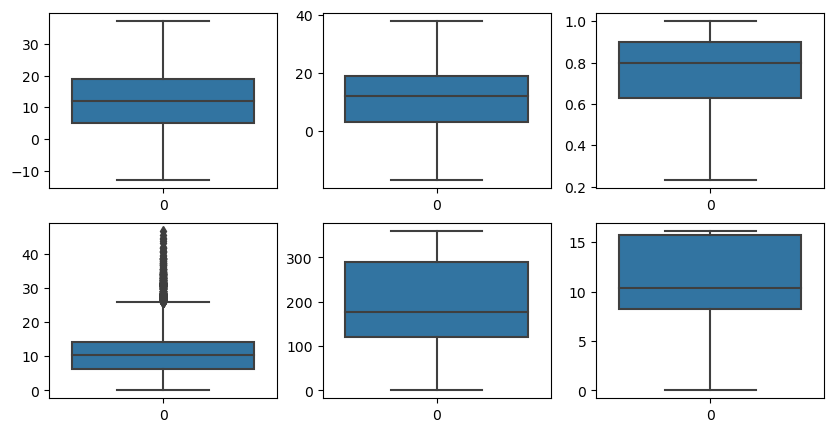

In [12]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['Temperature (C)'], ax = axs[0,0])
plt2 = sns.boxplot(data['Apparent Temperature (C)'], ax = axs[0,1])
plt3 = sns.boxplot(data['Humidity'], ax = axs[0,2])
plt4 = sns.boxplot(data['Wind Speed (km/h)'], ax = axs[1,0])
plt5 = sns.boxplot(data['Wind Bearing (degrees)'], ax = axs[1,1])
plt6 = sns.boxplot(data['Visibility (km)'], ax = axs[1,2])

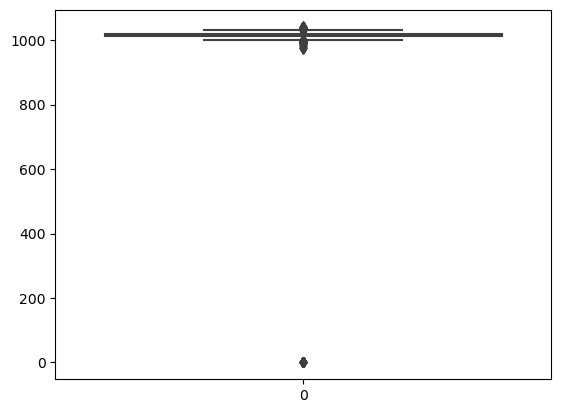

In [13]:
plt7 = sns.boxplot(data['Pressure (millibars)'])

In [14]:
data = df.drop(["Pressure (millibars)"],axis=1)

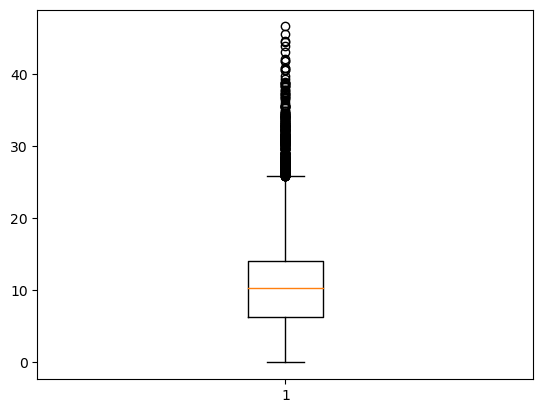

In [15]:
# To remove the outlier we need to use IQR

# For Wind Speed 
plt.boxplot(data['Wind Speed (km/h)'])
q1=data['Wind Speed (km/h)'].quantile(0.25)
q3=data['Wind Speed (km/h)'].quantile(0.75)
IQR = q3-q1
data=data[(data['Wind Speed (km/h)']>=q1-1.5*IQR) & (data['Wind Speed (km/h)']<=q3+1.5*IQR)]  

In [16]:
data.skew()

Unnamed: 0.1               -0.012089
Unnamed: 0                 -0.012089
Temperature (C)             0.216338
Apparent Temperature (C)    0.056784
Humidity                   -0.769314
Wind Speed (km/h)           0.405141
Wind Bearing (degrees)     -0.141796
Visibility (km)            -0.632924
Loud Cover                  0.000000
dtype: float64

In [17]:
print(data)

       Unnamed: 0.1  Unnamed: 0                 Formatted Date Precip Type  \
0                 0           0  2015-02-22 00:00:00.000 +0100        rain   
1                 1           1  2015-02-22 01:00:00.000 +0100        rain   
2                 2           2  2015-02-22 02:00:00.000 +0100        rain   
3                 3           3  2015-02-22 03:00:00.000 +0100        rain   
4                 4           4  2015-02-22 04:00:00.000 +0100        rain   
...             ...         ...                            ...         ...   
14995         14995       14995  2016-09-09 19:00:00.000 +0200        rain   
14996         14996       14996  2016-09-09 20:00:00.000 +0200        rain   
14997         14997       14997  2016-09-09 21:00:00.000 +0200        rain   
14998         14998       14998  2016-09-09 22:00:00.000 +0200        rain   
14999         14999       14999  2016-09-09 23:00:00.000 +0200        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Win

In [18]:
data.shape

(14545, 12)

In [19]:
data = df.drop(['Unnamed: 0.1','Unnamed: 0','Formatted Date','Loud Cover'],axis=1)

## Data Visualization

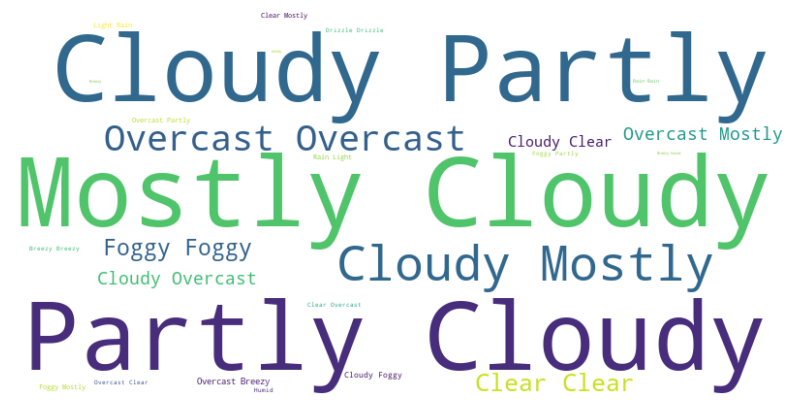

In [20]:
# Creating Word Cloud for Summary

from wordcloud import WordCloud 

text = ' '.join(data['Summary'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Populate list of numerical and categorical variables

import pandas as pd
import pandas.api.types as ptypes

num_list = []
cat_list = []

for column in data:
    if ptypes.is_numeric_dtype(data[column]):
        num_list.append(column) 
    elif ptypes.is_string_dtype(data[column]):
        cat_list.append(column)

print("Numerical: ", num_list) 
print(" ")
print("Categorical: ", cat_list)

Numerical:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
 
Categorical:  ['Precip Type', 'Summary']


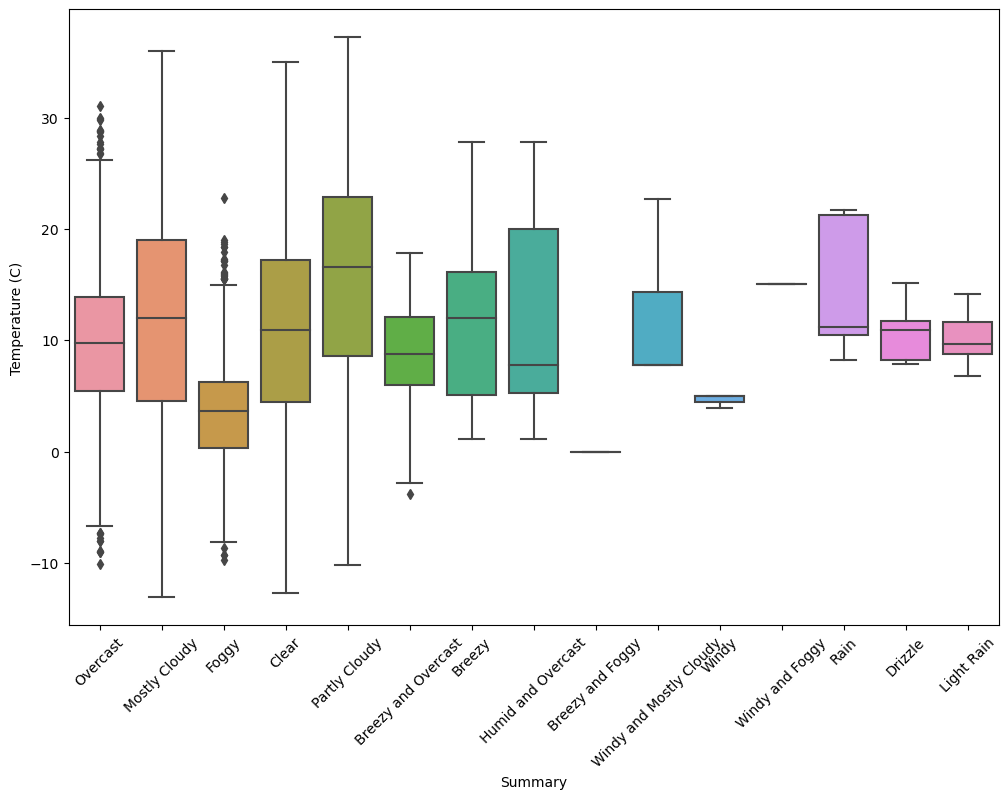

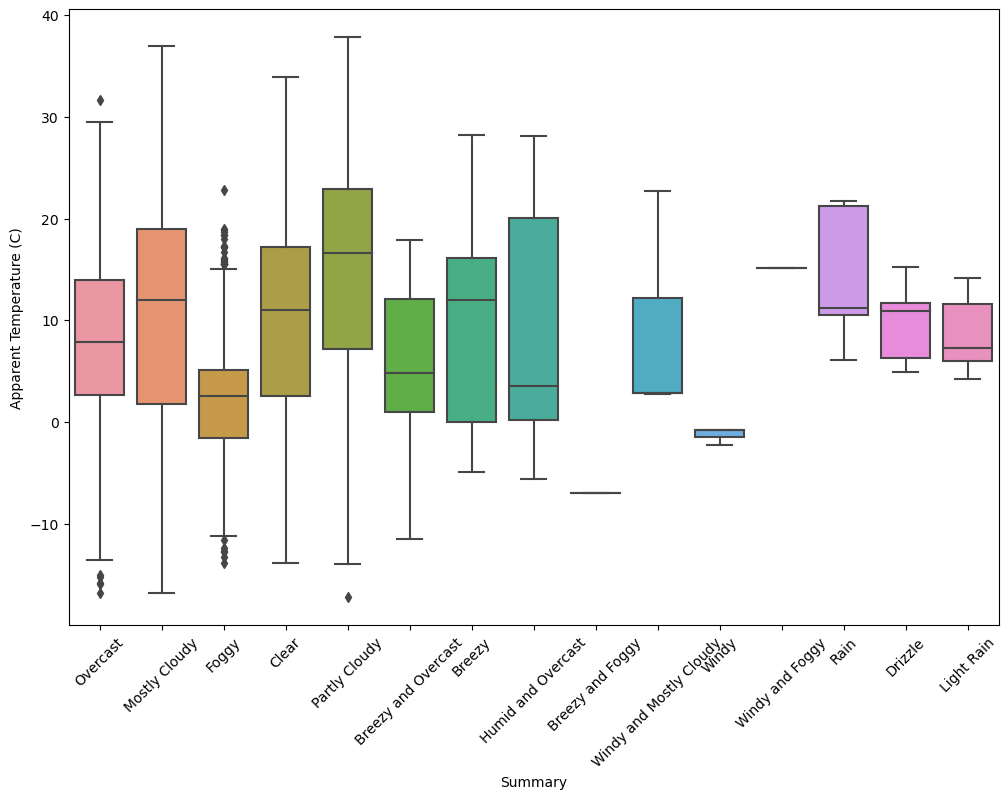

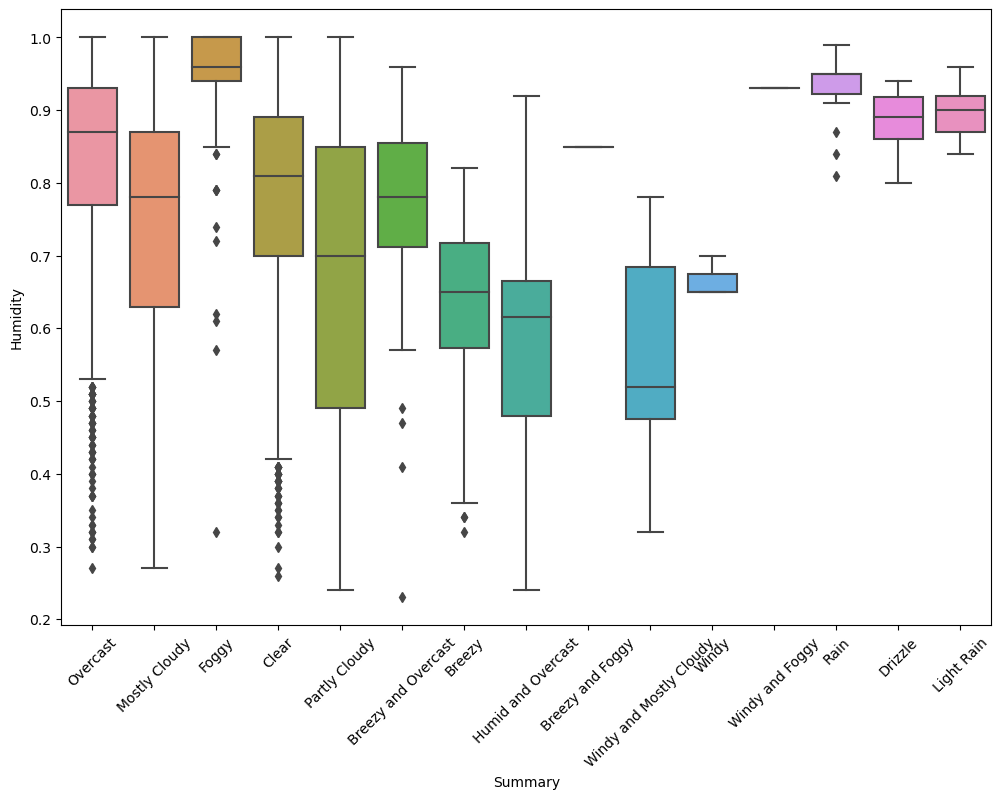

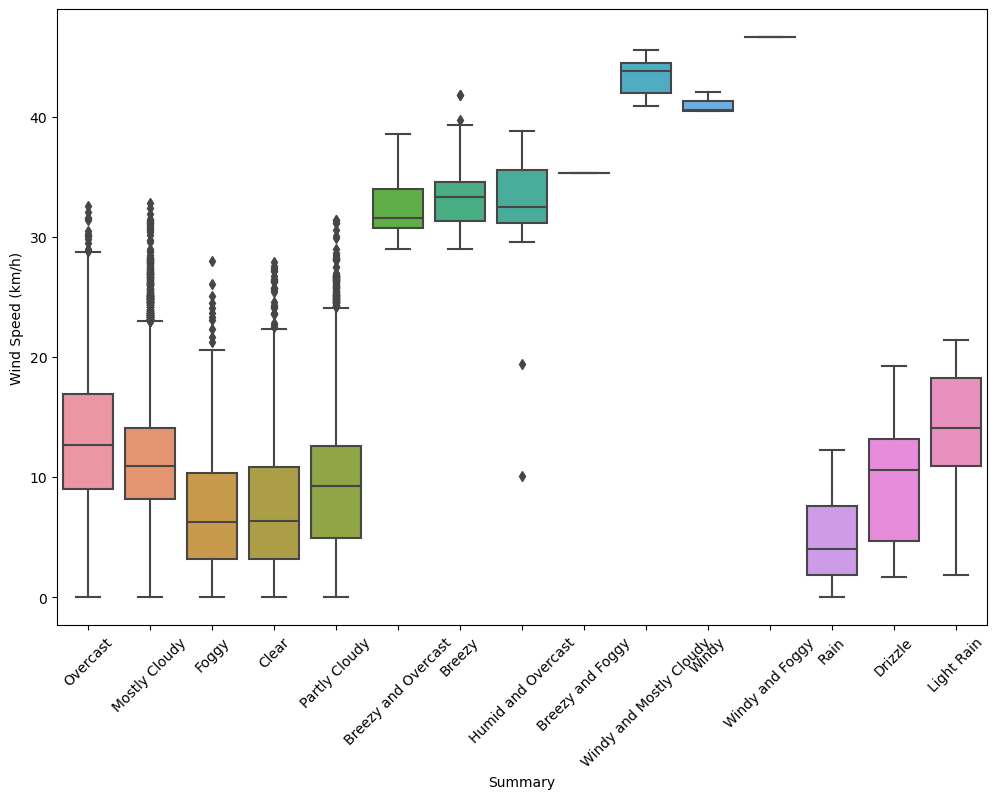

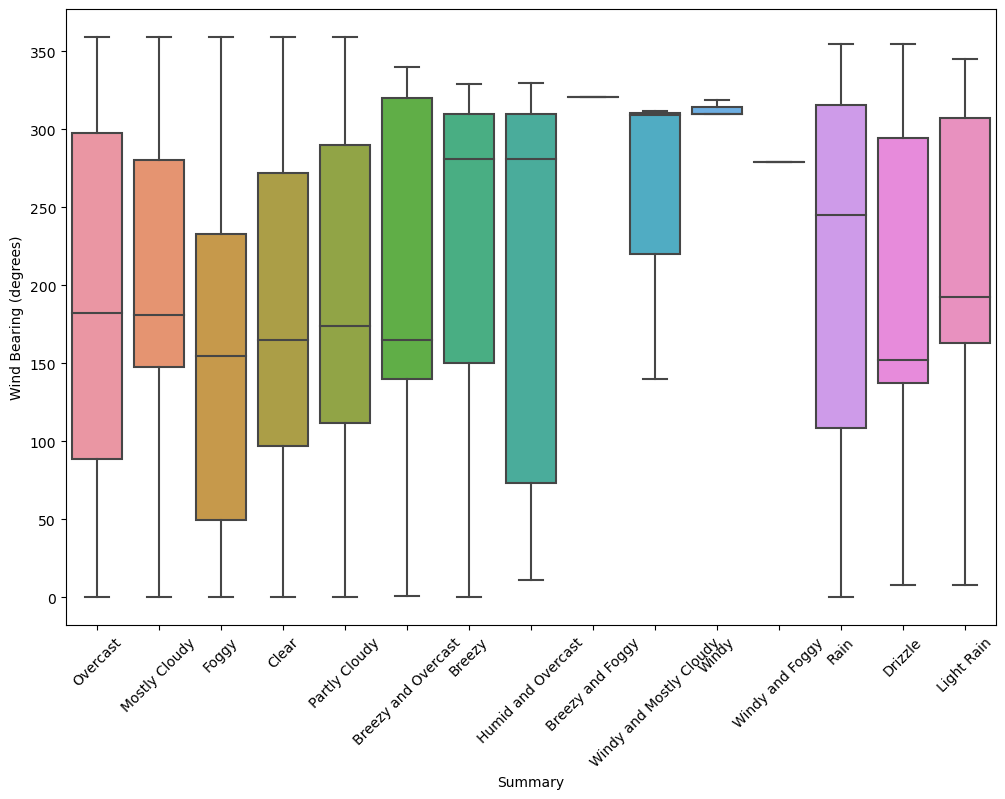

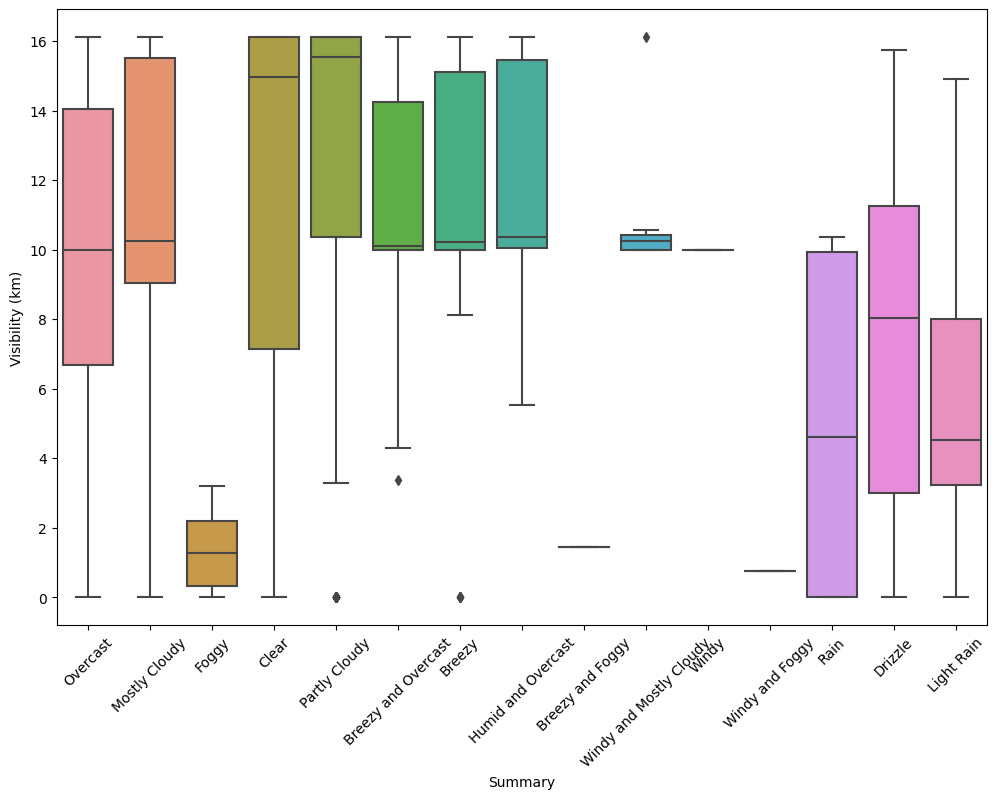

In [22]:
numeric = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)']

for i in numeric:
    plt.figure(figsize = (12,8))
    sns.boxplot(x = data['Summary'], y = data[i])
    plt.xticks(rotation=45)
    plt.show()

### Correlation Plot

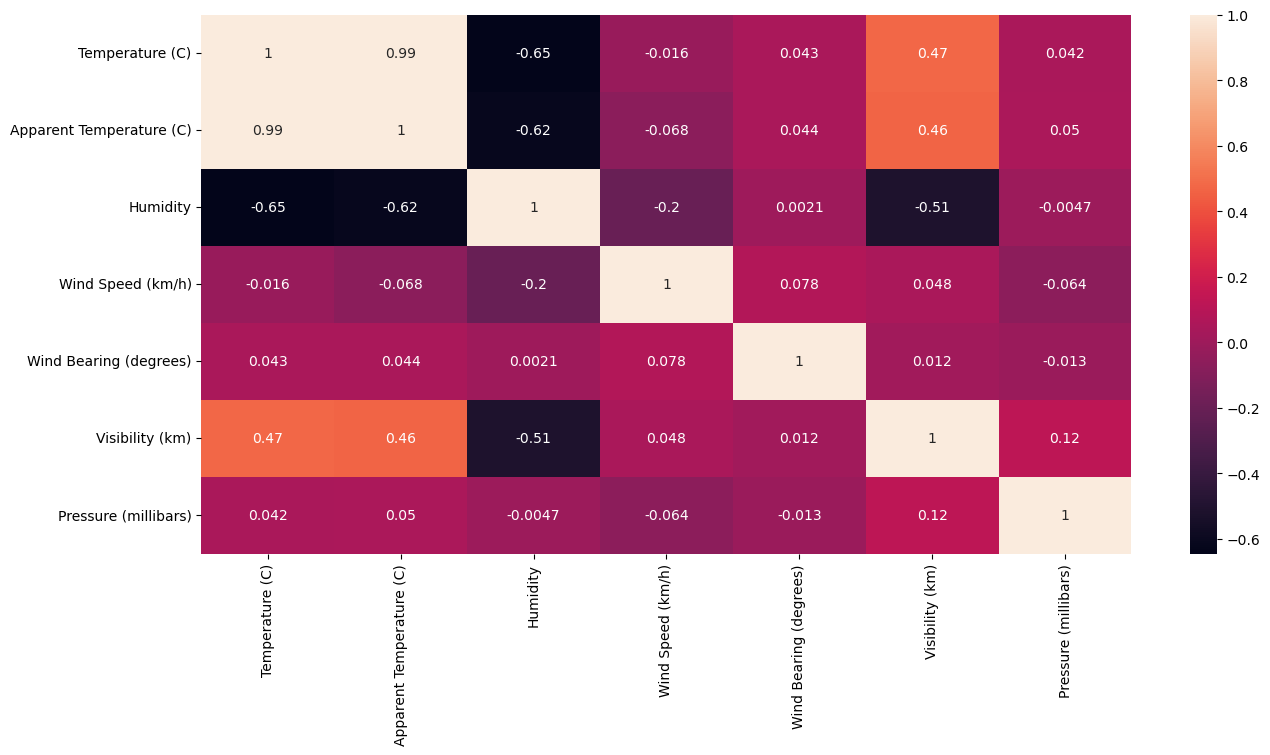

In [23]:
# Let's see the correlation matrix 
plt.figure(figsize = (15,7))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [24]:
c=data.corr()
c

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.993815,-0.645711,-0.015955,0.042798,0.474728,0.042249
Apparent Temperature (C),0.993815,1.000000,-0.617432,-0.068048,0.043902,0.462298,0.050294
Humidity,-0.645711,-0.617432,1.000000,-0.204326,0.002055,-0.512713,-0.004658
Wind Speed (km/h),-0.015955,-0.068048,-0.204326,1.000000,0.078158,0.047601,-0.064451
Wind Bearing (degrees),0.042798,0.043902,0.002055,0.078158,1.000000,0.012147,-0.013493
Visibility (km),0.474728,0.462298,-0.512713,0.047601,0.012147,1.000000,0.122085
Pressure (millibars),0.042249,0.050294,-0.004658,-0.064451,-0.013493,0.122085,1.000000


In [25]:
df = data.head(50)

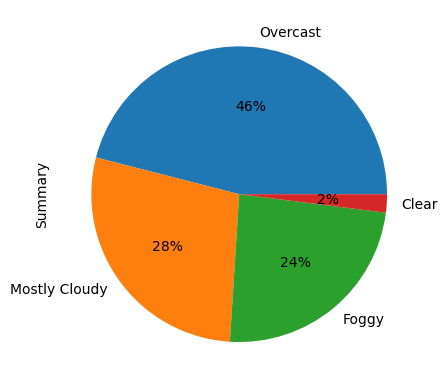

In [26]:
# Pie Plot

df["Summary"].value_counts().plot.pie(autopct = '%1.0f%%')
plt.show()

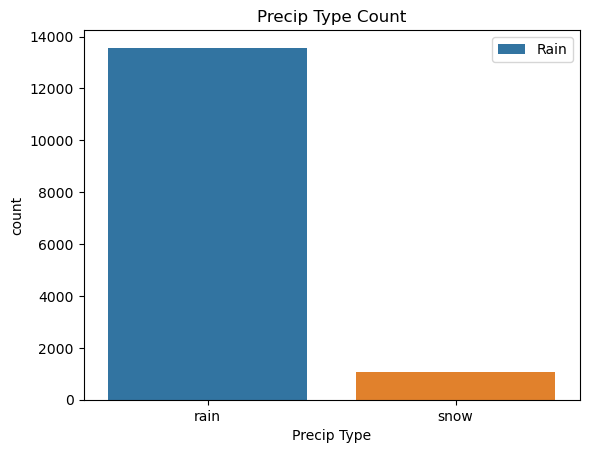

In [27]:
# Count Plot

ax = sns.countplot(x='Precip Type', data = data)
plt.title("Precip Type Count")
ax.legend(labels = ['Rain', 'Snow']) 

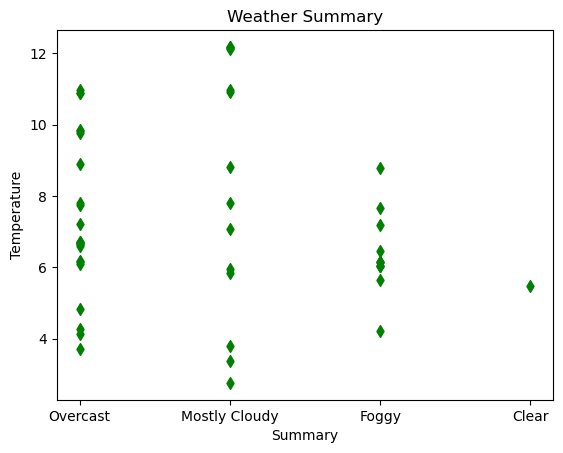

In [28]:
# Scatter Plot

x = df["Summary"]
y = df["Temperature (C)"]
plt.scatter(x,y,marker="d",color=["green"])
plt.xlabel("Summary")
plt.ylabel("Temperature")
plt.title("Weather Summary")
plt.show()

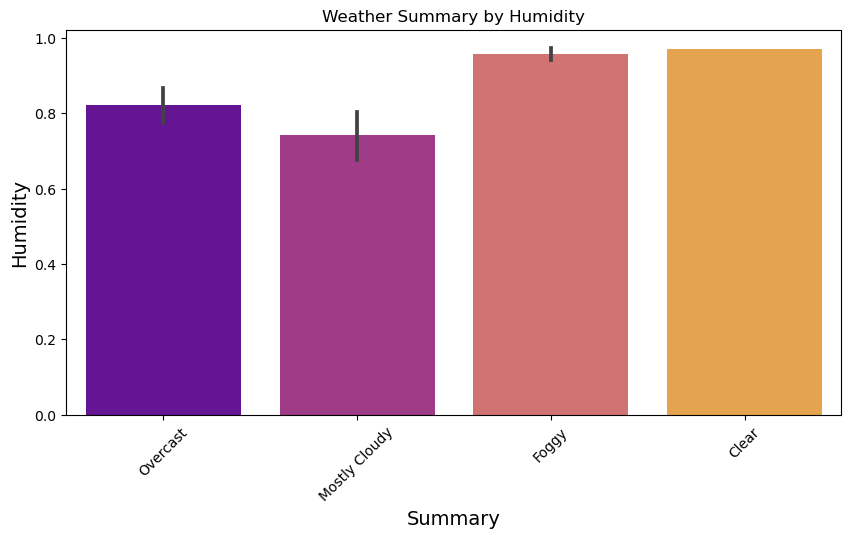

In [29]:
# Bar Plot

plt.figure(figsize=(10,5))
sns.barplot(x=df['Summary'], y=df['Humidity'],palette='plasma')
plt.title("Weather Summary by Humidity")
plt.xticks(rotation=45)
plt.xlabel("Summary",fontsize=14)
plt.ylabel("Humidity",fontsize=14)
plt.show()

<Axes: title={'center': 'Weather Summary by Pressure'}, xlabel='Summary', ylabel='Pressure (millibars)'>

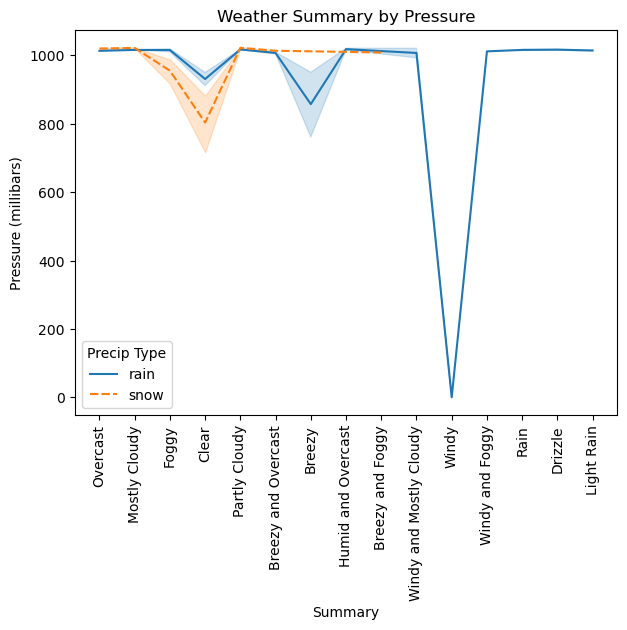

In [30]:
# Line Plot

plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title("Weather Summary by Pressure")
sns.lineplot(data=data, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

<Axes: xlabel='Wind Bearing (degrees)', ylabel='Temperature (C)'>

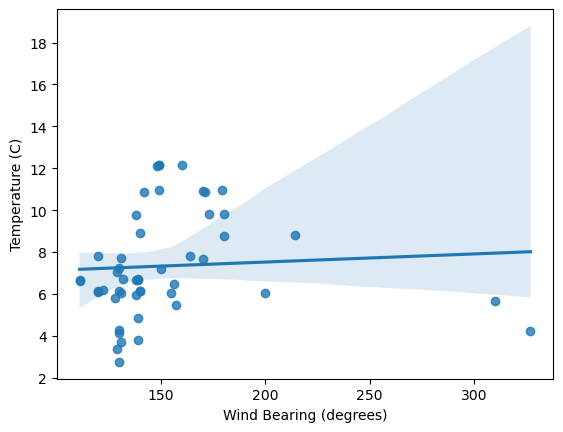

In [31]:
# Pairlot
# But first we have to plot regression plot

sns.regplot(data = df, x = 'Wind Bearing (degrees)', y = 'Temperature (C)')

<Axes: xlabel='Visibility (km)', ylabel='Temperature (C)'>

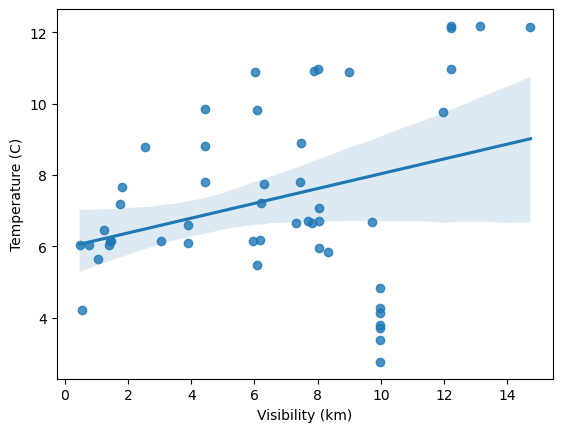

In [32]:
sns.regplot(data = df, x = 'Visibility (km)', y = 'Temperature (C)')

<Axes: xlabel='Pressure (millibars)', ylabel='Temperature (C)'>

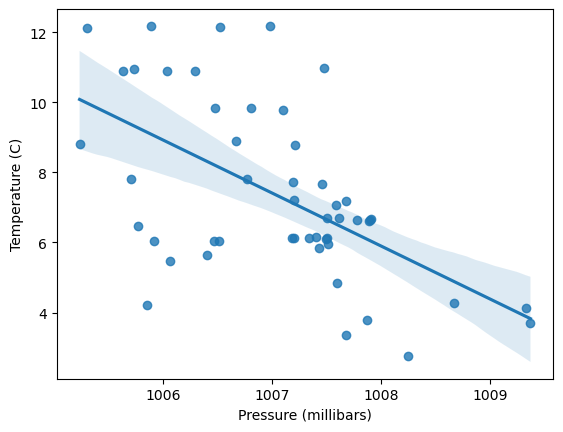

In [33]:
sns.regplot(data = df, x = 'Pressure (millibars)', y = 'Temperature (C)')

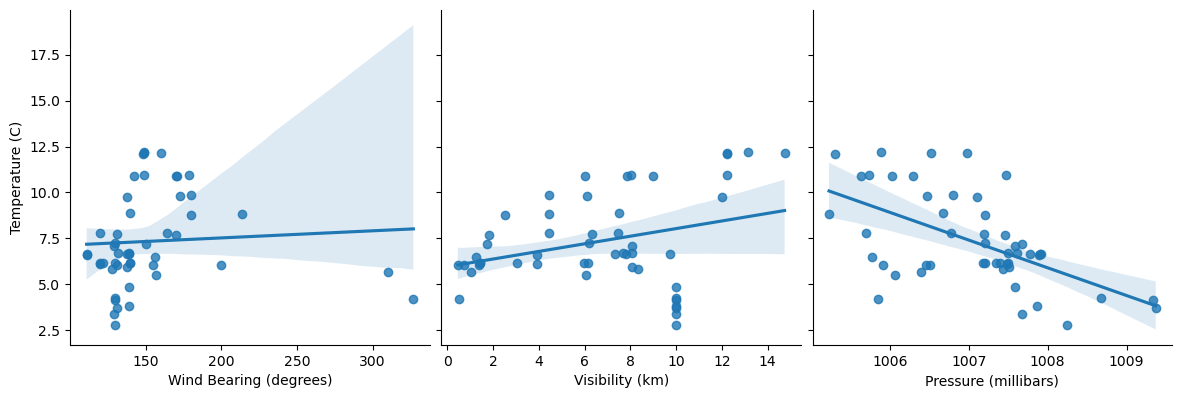

In [34]:
sns.pairplot(df, x_vars=['Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'], y_vars='Temperature (C)',size=4, aspect=1, kind= 'reg' )
plt.show()

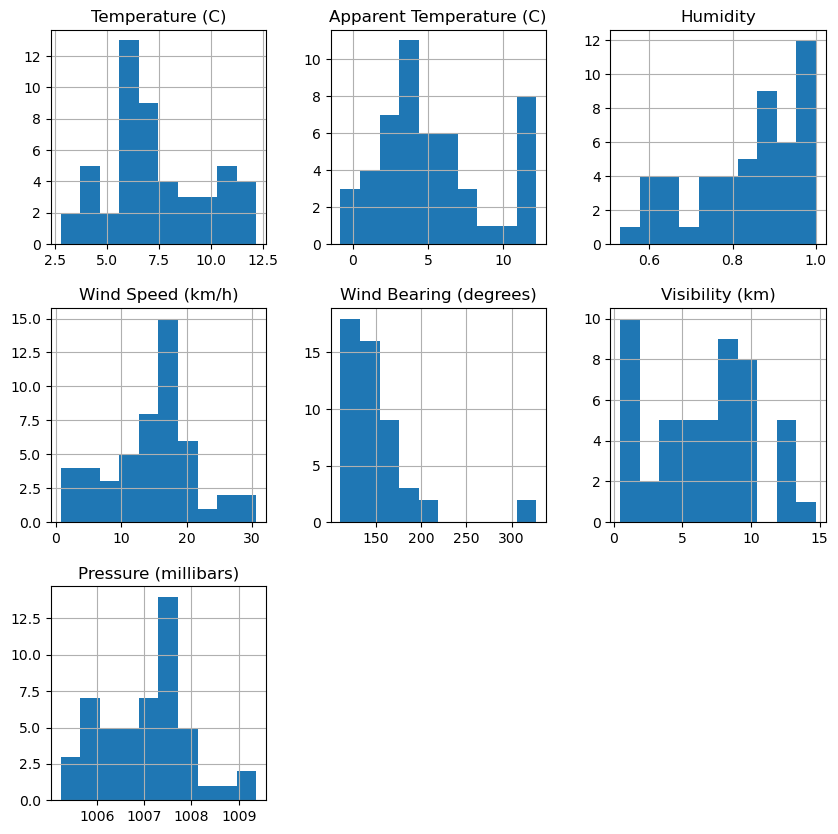

In [35]:
df.hist(bins=10, figsize=(10, 10))
plt.show()

## Data Preprocessing

In [36]:
# Checking for NULLs in the data
data.isnull().sum()

Precip Type                 374
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Summary                       0
dtype: int64

In [37]:
# Replacing Null values

data['Precip Type']=data['Precip Type'].fillna("rain")

In [38]:
data.isnull().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Summary                     0
dtype: int64

In [39]:
data.dtypes

Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Summary                      object
dtype: object

In [40]:
data["Summary"].unique()

array(['Overcast', 'Mostly Cloudy', 'Foggy', 'Clear', 'Partly Cloudy',
       'Breezy and Overcast', 'Breezy', 'Humid and Overcast',
       'Breezy and Foggy', 'Windy and Mostly Cloudy', 'Windy',
       'Windy and Foggy', 'Rain', 'Drizzle', 'Light Rain'], dtype=object)

In [41]:
# Replacing the categorical data to numerical 
# Feature conversion 

data['Summary'].replace({"Overcast":0, "Mostly Cloudy":1, "Partly Cloudy":2,"Foggy":3,"Clear":4,"Breezy":5,"Windy":6,
                         "Breezy and Overcast":7,"Breezy and Foggy":8,"Windy and Mostly Cloudy":9,"Windy and Foggy":10,
                         "Humid and Overcast":11,"Drizzle":12,"Light Rain":13,"Rain":14},inplace=True)
data['Precip Type'].replace({"rain":0,"snow":1},inplace=True)


In [42]:
data.dtypes

Precip Type                   int64
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Pressure (millibars)        float64
Summary                       int64
dtype: object

## Test-Train Split

In [43]:
#dividing the dataset

x = data.drop(['Summary'], axis=1)
y = data['Summary']

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
data_x_train,data_x_test,data_y_train,data_y_test=train_test_split(x,y,train_size = 0.7,test_size=0.3,random_state=101)

In [46]:
data_x_train.shape,data_x_test.shape,data_y_train.shape,data_y_test.shape

((10500, 8), (4500, 8), (10500,), (4500,))

## Model Building

#### Decision Tree

In [47]:
# Applying decision tree algorithm

from sklearn.tree import DecisionTreeClassifier 

In [48]:
d = DecisionTreeClassifier()

In [49]:
d.fit(data_x_train,data_y_train)
dt_predicted_data = d.predict(data_x_test)
print(dt_predicted_data)

[2 4 2 ... 2 0 2]


In [50]:
# Accuracy score approach 1

from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(data_y_test,dt_predicted_data)

0.5728888888888889

In [52]:
# Accuracy score approach 2 by using confusion matrix

from sklearn.metrics import confusion_matrix

dt_cm = confusion_matrix(dt_predicted_data,data_y_test)
print(dt_cm)

[[478 245 123   0  27   2   0   2   0   0   1   5   1   1]
 [192 842 409   0  55   4   0   0   0   0   1   2   2   1]
 [107 355 814   0 116   0   0   1   0   0   2   1   1   0]
 [  0   0   0 266   0   0   0   0   1   0   0   0   3   0]
 [ 32  61 121   1 142   0   0   0   0   0   0   0   0   0]
 [  0   2   1   0   0   4   0   2   0   1   1   0   0   0]
 [  0   0   0   0   0   1   1   0   0   0   0   0   0   0]
 [  0   2   1   0   0   5   0  14   0   0   3   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0]
 [  2   1   1   0   0   1   0   1   0   1   5   0   0   0]
 [  3   2   1   1   0   0   0   0   0   0   0   8   0   0]
 [  8   2   0   0   0   0   0   0   0   0   0   0   3   0]
 [  1   2   0   1   0   0   0   0   0   0   0   0   0   0]]


In [53]:
dt_ac = dt_cm.diagonal().sum()/dt_cm.sum()*100
print(dt_ac)

57.28888888888889


In [54]:
# Checking difference between original value and predicted value

diff = pd.DataFrame({"Previous Value":data_y_test,"Predicted Value":dt_predicted_data})
diff.head(10)

,Previous Value,Predicted Value
2786,1,2
9619,4,4
10357,1,2
2169,2,1
1139,2,2
4369,1,4
2715,2,0
9614,2,1
2875,2,1
3676,2,0


In [55]:
# Checking the feature importance

d.feature_importances_

array([0.00168825, 0.09880358, 0.10203307, 0.11827245, 0.15282941,
       0.12615867, 0.21808052, 0.18213404])

In [56]:
column_imp = pd.DataFrame({"column_importance" : list(d.feature_importances_),"column_names" : list(x)})
column_imp

,column_importance,column_names
0,0.001688,Precip Type
1,0.098804,Temperature (C)
2,0.102033,Apparent Temperature (C)
3,0.118272,Humidity
4,0.152829,Wind Speed (km/h)
5,0.126159,Wind Bearing (degrees)
6,0.218081,Visibility (km)
7,0.182134,Pressure (millibars)


In [57]:
from sklearn.metrics import classification_report

print(classification_report(dt_predicted_data,data_y_test))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56       885
           1       0.56      0.56      0.56      1508
           2       0.55      0.58      0.57      1397
           3       0.99      0.99      0.99       270
           4       0.42      0.40      0.41       357
           5       0.24      0.36      0.29        11
           6       1.00      0.50      0.67         2
           7       0.70      0.56      0.62        25
           8       0.00      0.00      0.00         0
           9       0.33      1.00      0.50         1
          11       0.38      0.42      0.40        12
          12       0.50      0.53      0.52        15
          13       0.30      0.23      0.26        13
          14       0.00      0.00      0.00         4

    accuracy                           0.57      4500
   macro avg       0.47      0.48      0.45      4500
weighted avg       0.57      0.57      0.57      4500



#### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(data_x_train,data_y_train)

RandomForestClassifier()

In [61]:
rf_predicted_data = rf.predict(data_x_test)
rf_predicted_data

array([2, 0, 1, ..., 2, 2, 2], dtype=int64)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(data_y_test,rf_predicted_data)

0.6704444444444444

In [64]:
rf_cm = confusion_matrix(rf_predicted_data,data_y_test)
print(rf_cm)

[[ 576  201   63    0   17    0    0    3    0    0    1    6    4    1]
 [ 169  919  265    0   49    7    0    1    0    0    3    1    0    0]
 [  75  384 1112    0  162    0    0    1    0    0    4    2    0    1]
 [   0    0    0  267    1    0    0    0    1    0    0    1    2    0]
 [   2    6   30    0  110    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    3    1    0    0    1    0    0    0    0]
 [   0    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    6    0   15    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    1    0    0    0    0    0    0    2    5    0    0    0]
 [   1    0    0    1    0    0    0    0    0    0    0    6    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    4    0]
 [   0    0    0    1    0    0    0    0    0    0

In [65]:
rf_ac = rf_cm.diagonal().sum()/rf_cm.sum()*100
print(rf_ac)

67.04444444444444


In [66]:
from sklearn.metrics import classification_report

print(classification_report(rf_predicted_data,data_y_test))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       872
           1       0.61      0.65      0.63      1414
           2       0.76      0.64      0.69      1741
           3       0.99      0.98      0.99       272
           4       0.32      0.74      0.45       148
           5       0.18      0.50      0.26         6
           6       0.00      0.00      0.00         1
           7       0.75      0.65      0.70        23
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.38      0.56      0.45         9
          12       0.38      0.75      0.50         8
          13       0.40      0.80      0.53         5
          14       0.00      0.00      0.00         1

    accuracy                           0.67      4500
   macro avg       0.39      0.50      0.42      4500
weighted avg       0.70      0.67      0.68      4500



#### SVM

In [67]:
from sklearn.svm import SVC

In [68]:
s = SVC()

In [69]:
s.fit(data_x_train,data_y_train)

SVC()

In [70]:
svm_predicted_data = s.predict(data_x_test)
svm_predicted_data

array([2, 1, 2, ..., 2, 1, 1], dtype=int64)

In [71]:
accuracy_score(data_y_test,svm_predicted_data)

0.4071111111111111

In [72]:
svm_cm = confusion_matrix(svm_predicted_data,data_y_test)
print(svm_cm)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 692 1097  769  242  204   13    0   20    1    3   12   15   10    1]
 [ 131  417  702   23  103    1    0    0    0    0    1    1    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    4   33    3    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0

In [73]:
svm_ac = svm_cm.diagonal().sum()/svm_cm.sum()*100
print(svm_ac)

40.71111111111111


In [74]:
from sklearn.metrics import classification_report

print(classification_report(svm_predicted_data,data_y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.72      0.36      0.48      3079
           2       0.48      0.51      0.49      1380
           3       0.00      0.00      0.00         0
           4       0.10      0.80      0.17        41
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

    accuracy                           0.41      4500
   macro avg       0.09      0.12      0.08      4500
weighted avg       0.64      0.41      0.48      4500



## Model Evaluation

In [75]:
list1=["DT","RF","SVM"]
list2=[dt_ac,rf_ac,svm_ac]

In [76]:
Base_model=pd.DataFrame({"Model_Name":list1,"Accuracy":list2})
Base_model

,Model_Name,Accuracy
0,DT,57.288889
1,RF,67.044444
2,SVM,40.711111


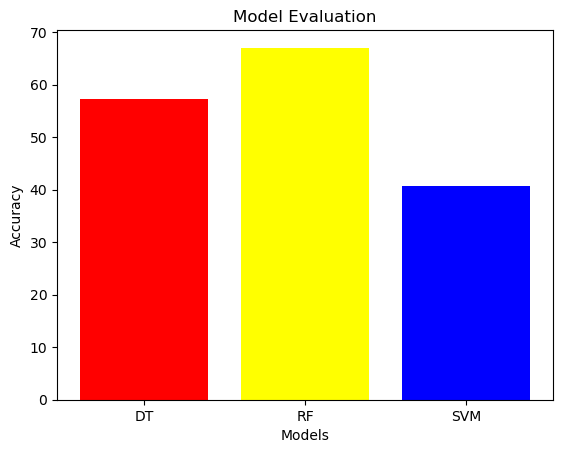

In [77]:
c = ['red', 'yellow', 'blue']
plt.bar(Base_model["Model_Name"],Base_model["Accuracy"], color = c)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Evaluation")
plt.show()

#### Conclusion : Accuracy of this model achieved for Weather dataset is 66.44%. High accuracy is achieved using Random Forest model then the model with all variables while predicting using test dataset.